In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import jieba
#from wordcloud import WordCloud
#from pandas.core.frame import DataFrame
from collections import Counter

import os
os.chdir('D://BaiduNetdiskWorkspace\A河北地质大学图书馆项目\校平台项目\文献综述写文章\分词')


In [18]:
#读入数据
import xlrd
import openpyxl
from openpyxl import Workbook
from openpyxl import load_workbook
# data = openpyxl.load_workbook('yingwen_hb.xls',usecols=['Publication Year','Author Keywords'])
data = pd.read_excel('yingwen_hb.xls', engine = 'xlrd', usecols=['Publication Year','Author Keywords'])
data=data.dropna() #删除有缺失值的行
data['Publication Year']=data['Publication Year'].astype('int')

Cipin_data_hz=pd.DataFrame(columns=['Keywords'])#

#按年取数据（关键词）    
for i in range(2018,2023):
    data_n=data[data['Publication Year']==i]['Author Keywords']
    text=';'.join(data_n)
    text =text.lower()
#    text=text.capitalize()#将英文首字母转换成大写
    Ci_list1 = text.split(';')
    Ci_list=[x.strip() for x in Ci_list1]   ###list = [x.strip() for x in a if x.strip()!='']
#    Ci_list=Ci_list.strip()#.strip()移除字符串头尾指定的字符（默认为空格）   有错误，list不能.strip()
    Cipin=dict(Counter(Ci_list).most_common(20))
    Cipin_data=pd.DataFrame(pd.Series(Cipin),columns=[i])
    Cipin_data=Cipin_data.reset_index().rename(columns={'index':'Keywords'})
    Cipin_data_hz=pd.merge(Cipin_data,Cipin_data_hz,on='Keywords',how='outer')#  how='outer'全连接，取并集
Cipin_data_hz.to_excel('Cipin_n.xls')
print(Cipin_data_hz)

ValueError: No engine for filetype: 'xls'

In [27]:
Ci_n=Cipin_data_hz.T
Ci_n

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Keywords,recommender systems,collaborative filtering,knowledge graph,deep learning,recommender system,recommendation system,covid-19,systematic review,feature extraction,semantic similarity,...,decision making,user-generated content,woody plants,twitter,restricted boltzmann machine,animal welfare,social big data,traditional uses,pharmacology,locality reconstruction
2022,16.0,15.0,10.0,7.0,7.0,6.0,6.0,5.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,20.0,12.0,7.0,5.0,6.0,9.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,15.0,10.0,5.0,8.0,7.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,22.0,17.0,NaN,3.0,8.0,5.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,18.0,18.0,NaN,5.0,13.0,7.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,3.0,3.0,2.0,2.0,2.0,2.0,2.0


In [29]:
Ci_n=Cipin_data_hz.T
array = np.array(Ci_n)  # 将df转换为list对象
list_1 = array.tolist()  # 将array转换为list
list_h  = list_1[0]         # 获取第一行的数据
#print(list_h)
Ci_n.columns = list_h 
Ci_n=Ci_n.reset_index().rename(columns={'index':'Year'})
Ci_n.drop([0], inplace=True) 
Ci_n=Ci_n.sort_values(by=['Year'])
Ci_n.fillna(0,inplace=True) # 将空值填充为0，非交易日的SP500数据填补为0
Ci_n=Ci_n.astype(int)#把浮点型强制转化为int
Ci_n
#.to_excel('Ci_n.xls')

,Year,recommender systems,collaborative filtering,knowledge graph,deep learning,recommender system,recommendation system,covid-19,systematic review,feature extraction,...,decision making,user-generated content,woody plants,twitter,restricted boltzmann machine,animal welfare,social big data,traditional uses,pharmacology,locality reconstruction
5,2018,18,18,0,5,13,7,0,0,2,...,0,0,0,3,3,2,2,2,2,2
4,2019,22,17,0,3,8,5,0,0,0,...,2,2,2,0,0,0,0,0,0,0
3,2020,15,10,5,8,7,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,20,12,7,5,6,9,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,16,15,10,7,7,6,6,5,4,...,0,0,0,0,0,0,0,0,0,0


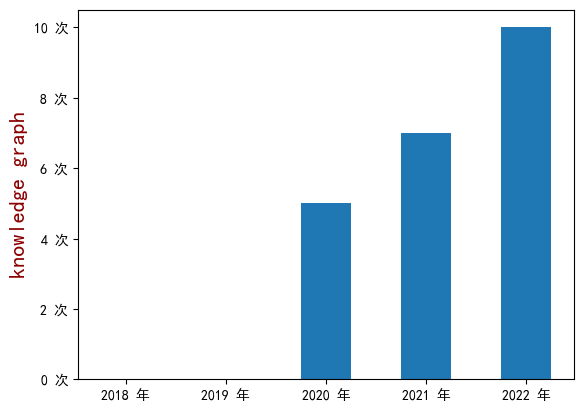

In [72]:
#绘制纵向柱形图（刻画某词出现次数）
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  
from pylab import mpl
# 设置显示中文字体
# mpl.rcParams["font.sans-serif"] = ["SimHei"]
Mc='knowledge graph'#某词 
plt.bar(Ci_n['Year'],Ci_n[Mc],0.5)#,color=blue
plt.xticks(Ci_n['Year'])
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f 次'))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f 年'))
font = {'family': 'SimHei',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
#plt.ylabel(Mc+'(出现次数)', fontdict=font)
plt.ylabel(Mc, fontdict=font)
#plt.title(Mc)
plt.savefig('knowledge graph按年.jpg', dpi=600,bbox_inches='tight')
plt.show()

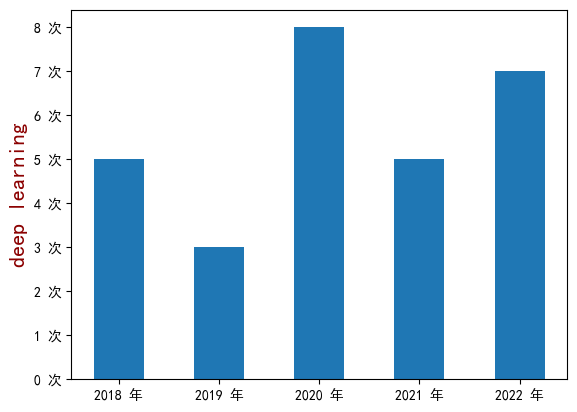

In [74]:
#绘制纵向柱形图（刻画某词出现次数）
Mc='deep learning'#某词 
plt.bar(Ci_n['Year'],Ci_n[Mc],0.5)#,color=blue
plt.xticks(Ci_n['Year'])
plt.ylabel(Mc)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f 次'))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f 年'))
font = {'family': 'SimHei',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.ylabel(Mc, fontdict=font)
#plt.title(Mc)
plt.savefig('deep learning按年.jpg', dpi=600,bbox_inches='tight')
plt.show()

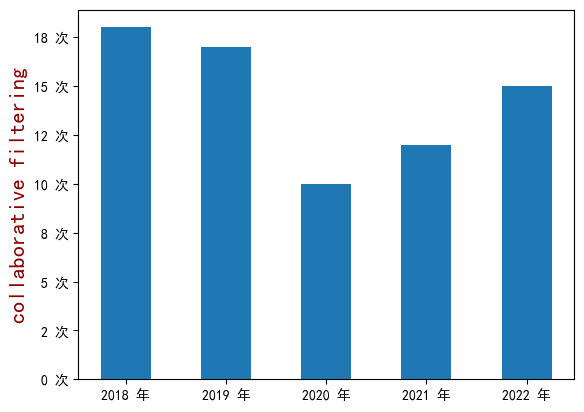

In [75]:
#绘制纵向柱形图（刻画某词出现次数）
Mc='collaborative filtering'#某词 
plt.bar(Ci_n['Year'],Ci_n[Mc],0.5)#,color=blue
plt.xticks(Ci_n['Year'])
plt.ylabel(Mc)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f 次'))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f 年'))
font = {'family': 'SimHei',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.ylabel(Mc, fontdict=font)
#plt.title(Mc)
plt.savefig('collaborative filtering按年.jpg', dpi=600,bbox_inches='tight')
plt.show()

In [9]:
from openpyxl import Workbook
from openpyxl import load_workbook
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import jieba
#from wordcloud import WordCloud
from pandas.core.frame import DataFrame
from collections import Counter
from tqdm import tqdm
import os
os.chdir('D:/BaiduNetdiskWorkspace/A河北地质大学图书馆项目/校平台项目/文献综述写文章/分词')

#中文词频统计
#读入数据'
# if os.path.exists('CNKI-409-20230504'):
#     new_wb = load_workbook('CNKI-409-20230504.xls')
# else:
#     new_wb = Workbook()
data = pd.read_excel('CNKI-409-20230504.xls', engine='openpyxl', usecols=['Year-年','Keyword-关键词'])
data=data.dropna() #删除有缺失值的行
data['Year-年']=data['Year-年'].astype('int')
Cipin_data_hz=pd.DataFrame(columns=['Keywords'])#

#按年取数据（关键词）    
for i in range(2018,2023):
    data_n=data[data['Year-年']==i]['Keyword-关键词']
    text=';;'.join(data_n)
    text =text.lower()
#    text=text.capitalize()#将英文首字母转换成大写
    Ci_list1 = text.split(';;')
    Ci_list=[x.strip() for x in Ci_list1]   ###list = [x.strip() for x in a if x.strip()!='']
#    Ci_list=Ci_list.strip()#.strip()移除字符串头尾指定的字符（默认为空格）   有错误，list不能.strip()
    Cipin=dict(Counter(Ci_list).most_common(20))
    Cipin_data=pd.DataFrame(pd.Series(Cipin),columns=[i])
    Cipin_data=Cipin_data.reset_index().rename(columns={'index':'Keywords'})
    Cipin_data_hz=pd.merge(Cipin_data,Cipin_data_hz,on='Keywords',how='outer')#  how='outer'全连接，取并集
Cipin_data_hz.to_excel('Cipin_n_CNKI.xls')



#绘制纵向柱形图（刻画某词出现次数）
Mc='协同过滤'#某词 
#plt.figure(figsize=(15,8))#图大小
plt.rcParams["font.family"]="SimHei"#加入一行这个代码，我们的中文就能正确显示了，这行代码就是把我们的字体设置为“SimHei”中文黑体。
plt.bar(Ci_n['Year'],Ci_n[Mc],0.5)#,color=blue
plt.xticks(Ci_n['Year'])
plt.ylabel(Mc)
#plt.title(Mc)
plt.show()

BadZipFile: File is not a zip file

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
#定义函数来显示柱状上的数值
#def autolabel(rects):
# for rect in rects:
#  height = rect.get_height()
#  plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))
if __name__ == '__main__': 

    total_width, n = 0.8, 2
    width = total_width / n
    x=[0,1,2,3,4,5]
    plt.rc('font', family='SimHei', size=14)#设置中文显示，否则出现乱码！
    a=plt.bar(Ci_n['Year']-0.2, Ci_n['深度学习'], width=width, label='中文',fc = 'b') 
    for i in range(len(x)):
        x[i] = x[i] + width*2
    b=plt.bar(Ci_n['Year']+0.2, Ci_n['deep learning'], width=width, label='英文',fc = 'k')#,tick_label = Ci_n['Year']
# autolabel(a)
# autolabel(b)
    plt.xlabel('年  份')
    plt.ylabel('次  数')
    plt.title('深度学习')
    plt.legend()
    plt.savefig('knowledge graph按年_深度学习2.jpg', dpi=600,bbox_inches='tight')
    plt.show()

NameError: name 'Ci_n' is not defined